In [3]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
import re
import string
import tf_keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# Downloading stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv("c:/MBAN- Schulich/MBAN- Sem 2/Data Science 2/Final Exam/Recipe Reviews and User Feedback Dataset.csv")
df['text'] = df['text'].fillna("no_comment")

In [4]:
# Text cleaning function
def clean_text(t):
    t = t.lower()
    t = re.sub(r'<.*?>', '', t)
    t = re.sub(r'[^a-z0-9\s]', '', t)
    t = re.sub(r'\d+', '', t)
    tokens = word_tokenize(t)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    t = " ".join(tokens)
    return t

df['clean_text'] = df['text'].apply(clean_text)

In [5]:
# Distribution of target variable
print("Stars distribution:")
print(df['stars'].value_counts())

Stars distribution:
stars
5    13829
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64


In [ ]:
# Preparing features and target
X = df['clean_text'].values
y = df['stars'].values 
y_cat = to_categorical(y, num_classes=6)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print("Train size:", len(X_train), "Val size:", len(X_val), "Test size:", len(X_test))

Train size: 10908 Val size: 3637 Test size: 3637


In [9]:
# Tokenizer setup
vocabulary_size = 20000
max_len = 100
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

# Preprocess text data
def preprocess_text_data(X, tokenizer, max_len):
    seq = tokenizer.texts_to_sequences(X)
    seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    return seq

X_train_seq = preprocess_text_data(X_train, tokenizer, max_len)
X_val_seq = preprocess_text_data(X_val, tokenizer, max_len)
X_test_seq = preprocess_text_data(X_test, tokenizer, max_len)

LSTM

In [13]:
lstm_model = Sequential([
    layers.Embedding(input_dim=vocabulary_size, output_dim=64, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_model.summary()

# Train LSTM Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_lstm = lstm_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=10, batch_size=128,
    callbacks=[early_stopping]
)

# Evaluate LSTM Model
test_loss_lstm, test_acc_lstm = lstm_model.evaluate(X_test_seq, y_test)
print(f"LSTM Test Accuracy: {test_acc_lstm}")

c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step - accuracy: 0.7136 - loss: 1.1130 - val_accuracy: 0.7608 - val_loss: 0.8605
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 954ms/step - accuracy: 0.7596 - loss: 0.8401 - val_accuracy: 0.7616 - val_loss: 0.7678
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 422ms/step - accuracy: 0.7726 - loss: 0.7081 - val_accuracy: 0.7655 - val_loss: 0.7158
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8067 - loss: 0.5862 - val_accuracy: 0.7611 - val_loss: 0.7320
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.8447 - loss: 0.4856 - val_accuracy: 0.7536 - val_loss: 0.7483
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 934ms/step - accuracy: 0.8659 - loss: 0.4254 - val_accuracy: 0.7616 - val_loss: 0.7964
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7585 - loss: 0.7922
LSTM Test Accuracy: 0.7514435052871704


CNN

In [ ]:
cnn_model = Sequential([
    layers.Embedding(input_dim=vocabulary_size, output_dim=64, input_length=max_len),
    layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

# Train CNN Model
history_cnn = cnn_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=10, batch_size=128,
    callbacks=[early_stopping]
)

# Evaluate CNN Model
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test_seq, y_test)
print(f"CNN Test Accuracy: {test_acc_cnn}")

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7206 - loss: 1.1418 - val_accuracy: 0.7608 - val_loss: 0.8124
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7576 - loss: 0.7845 - val_accuracy: 0.7608 - val_loss: 0.7553
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7673 - loss: 0.6785 - val_accuracy: 0.7627 - val_loss: 0.7626
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7861 - loss: 0.5951 - val_accuracy: 0.7514 - val_loss: 0.7713
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8258 - loss: 0.4954 - val_accuracy: 0.7157 - val_loss: 0.8683
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7080 - loss: 0.8804
CNN Test Accuracy: 0.7093758583068848


Comparison of Models


Accuracy Comparison:
LSTM Test Accuracy: 0.7514435052871704
CNN Test Accuracy: 0.7093758583068848


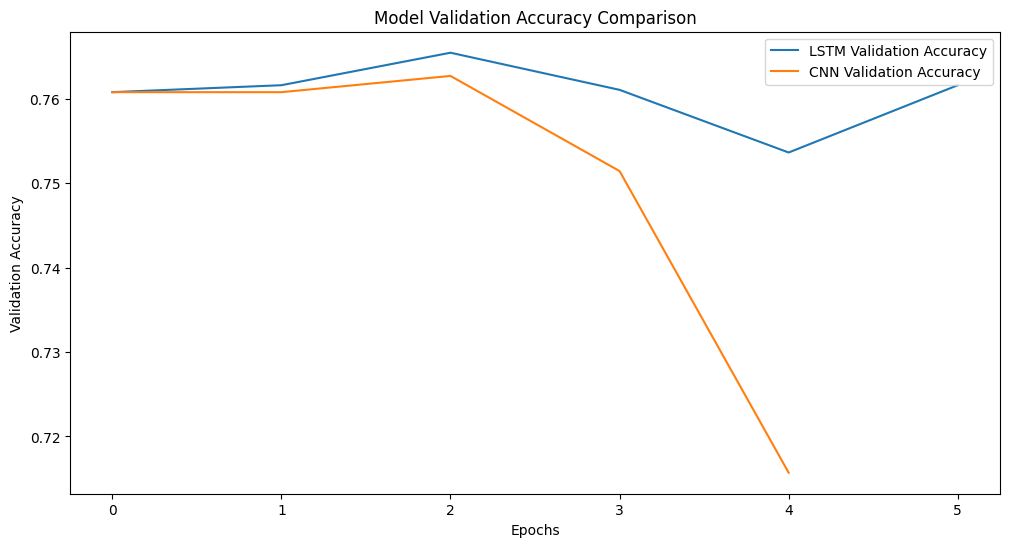

In [17]:
# Accuracy Comparison
print("\nAccuracy Comparison:")
print(f"LSTM Test Accuracy: {test_acc_lstm}")
print(f"CNN Test Accuracy: {test_acc_cnn}")

# Plot Training History
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label} Validation Accuracy')
    plt.title('Model Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

plot_history([history_lstm, history_cnn], ['LSTM', 'CNN'])

Comparing precision, recall, and F1-score for both models:

In [18]:
from sklearn.metrics import classification_report

def evaluate_model(model, X_test_seq, y_test, labels):
    predictions = model.predict(X_test_seq)
    y_pred = predictions.argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    print(classification_report(y_true, y_pred, target_names=labels))

labels = [str(i) for i in range(6)]
print("LSTM Classification Report:")
evaluate_model(lstm_model, X_test_seq, y_test, labels)

print("CNN Classification Report:")
evaluate_model(cnn_model, X_test_seq, y_test, labels)

LSTM Classification Report:
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step


c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.34      0.15      0.21       339
           1       0.17      0.11      0.13        56
           2       0.00      0.00      0.00        47
           3       0.20      0.10      0.13        98
           4       0.30      0.25      0.27       331
           5       0.83      0.93      0.88      2766

    accuracy                           0.75      3637
   macro avg       0.30      0.26      0.27      3637
weighted avg       0.70      0.75      0.72      3637

CNN Classification Report:
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.24      0.35      0.29       339
           1       0.07      0.04      0.05        56
           2       0.00      0.00      0.00        47
           3       0.32      0.08      0.13        98
           4       0.24      0.21      0.23       331
           5       0.85      0.86      0.85      2766

    accur

c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Visualizing Loss Trends:

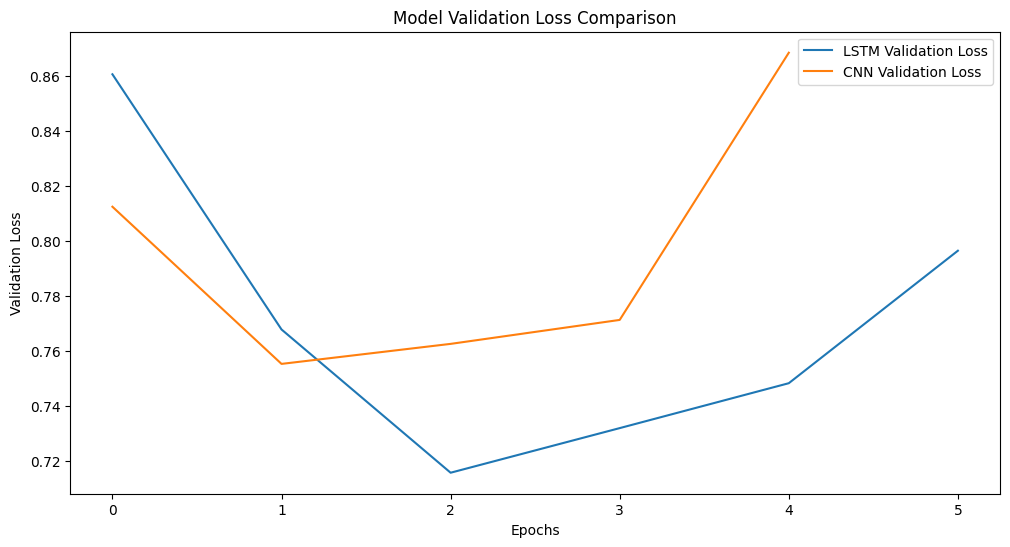

In [20]:
def plot_loss_histories(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label} Validation Loss')
    plt.title('Model Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

plot_loss_histories([history_lstm, history_cnn], ['LSTM', 'CNN'])